In [1]:
import os
import pandas as pd
import numpy as np
import nltk

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
path = "/content/drive/My Drive/NLP dataset"

In [4]:
os.listdir(path)

['Test.csv', 'Train.csv', 'SampleSubmission.csv']

In [5]:
Train_data = '/content/drive/My Drive/NLP dataset/Train.csv'
Test_data = '/content/drive/My Drive/NLP dataset/Test.csv'

In [6]:
train_data = pd.read_csv(Train_data)

In [7]:
train_data.head()

,ID,text,label
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression
1,9JDAGUV3,Why do I get hallucinations?,Drugs
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression
3,6UY7DX6Q,Why is life important?,Suicide
4,FYC0FTFB,How could I be helped to go through the depres...,Depression


In [8]:
train_data['text'][1]

'Why do I get hallucinations?'

In [9]:
from nltk.corpus import stopwords
stop_words =set(stopwords.words('english'))
from nltk import word_tokenize,sent_tokenize
from nltk.probability import FreqDist

In [10]:
nltk.download('wordnet')
from nltk.stem import PorterStemmer,WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
# initialize lemmatizer
stem = WordNetLemmatizer()

In [12]:
def preprocess_texts(dataset):
  tokens = []

  for i in range(len(dataset)):
    words =''.join(list(dataset['text'][i]))
    tok_words = word_tokenize(words)
    # remove stop words from texts
    filtered_words = [words for words in tok_words if words not in stop_words and len(words)>2]
    # lemmatize words in texta
    stem_words = [stem.lemmatize(words, pos='v') for words in filtered_words]
    tokens.append(stem_words)
    # return preprocessed text back to dataframe for split
    dataset['text'][i]=' '.join(tokens[i])

In [13]:
preprocess_texts(train_data)

In [14]:
train_data.head()

,ID,text,label
0,SUAVK39Z,feel better dieAm happy,Depression
1,9JDAGUV3,Why get hallucinations,Drugs
2,419WR1LQ,stresseed due lack financial support school,Depression
3,6UY7DX6Q,Why life important,Suicide
4,FYC0FTFB,How could help depression,Depression


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
# summarize class distribution
from collections import Counter
counter = Counter(train_data['label'])
counter

Counter({'Alcohol': 140, 'Depression': 352, 'Drugs': 58, 'Suicide': 66})

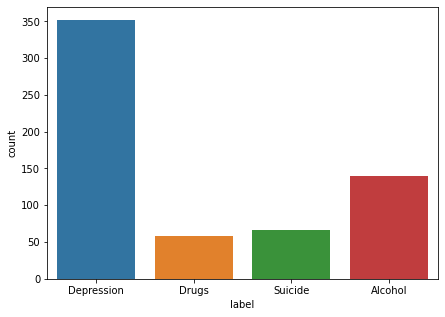

In [17]:
plt.figure(figsize=(7,5))
sns.countplot(train_data['label'])

In [18]:
# convert labels to numeric feature
label_encode = {'Alcohol':0,'Depression': 1,'Drugs': 2,'Suicide':3}

train_data['label_encode']=train_data['label'].map(label_encode)

In [19]:
train_data.head()

,ID,text,label,label_encode
0,SUAVK39Z,feel better dieAm happy,Depression,1
1,9JDAGUV3,Why get hallucinations,Drugs,2
2,419WR1LQ,stresseed due lack financial support school,Depression,1
3,6UY7DX6Q,Why life important,Suicide,3
4,FYC0FTFB,How could help depression,Depression,1


In [20]:
# summarize class distribution
from collections import Counter
counter = Counter(train_data['label_encode'])
counter

Counter({0: 140, 1: 352, 2: 58, 3: 66})

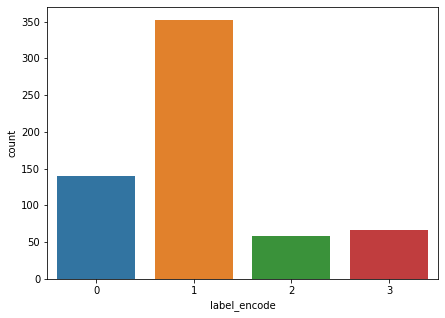

In [21]:
plt.figure(figsize=(7,5))
sns.countplot(train_data['label_encode'])

In [22]:
all_words = ' '.join(list(train_data['text'][:]))

In [23]:
all_words

"feel better dieAm happy Why get hallucinations stresseed due lack financial support school Why life important How could help depression What effect depression ones health Why everything hard deal life feel emotionally overwhelm How manage take alcohol heaven open smoke bhang How survive without money How stop What life become unbearable ever sad alone always drugsNow know cope negative aspects life feel empty absent mind experience depression study feel like alone world feel low place What get depression How stop use alcohol feel hopeless unworthy useless …How cope stress frorge past Does mediataton help stop weed addiction feel bad life difficulties also feel bad one control What effect smoke bhang Sadness hatredNow feel happiness Feelings like everything fall apart Now things control cope difficult situation avoid Deteriorating academic performance Effect alcohol society body How could stop use bhang How avoid drug abuse How stop What addiction mean feel reject right depress person 

In [24]:
all_words = word_tokenize(all_words)

In [25]:
len(all_words)

2498

In [26]:
X = list(train_data['text'])

In [27]:
X[:5]

['feel better dieAm happy',
 'Why get hallucinations',
 'stresseed due lack financial support school',
 'Why life important',
 'How could help depression']

In [28]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [29]:
# Tokenizing all words in the dataset
most_used = 2000
tokenizer = Tokenizer(num_words=most_used,lower=True)
tokenizer.fit_on_texts(all_words)
word_index = tokenizer.word_index

In [30]:
X_tokens = tokenizer.texts_to_sequences(X)
X_tokens= np.array(X_tokens)

In [31]:
X_tokens[:5]

array([list([1, 24, 262, 136]), list([10, 11, 183]),
       list([263, 264, 90, 64, 137, 73]), list([10, 7, 138]),
       list([2, 34, 25, 6])], dtype=object)

In [32]:
# A function that coverts texts to tokens and returns it back to te dataframe
def text_2_tokens(dataset):
  for i in range(len(dataset)):
    words = word_tokenize(dataset['text'][i])
    toks = tokenizer.texts_to_sequences(words)
    dataset['text'][i]=np.array(toks).reshape(len(toks),)

In [33]:
text_2_tokens(train_data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
train_data.head()

,ID,text,label,label_encode
0,SUAVK39Z,"[1, 24, 262, 136]",Depression,1
1,9JDAGUV3,"[10, 11, 183]",Drugs,2
2,419WR1LQ,"[263, 264, 90, 64, 137, 73]",Depression,1
3,6UY7DX6Q,"[10, 7, 138]",Suicide,3
4,FYC0FTFB,"[2, 34, 25, 6]",Depression,1


In [35]:
train_data['text'][0]

array([  1,  24, 262, 136])

In [36]:
# mapping values to keys since word_index as done the reverse
word_index = tokenizer.word_index
inverse_map = dict(zip(word_index.values(), word_index.keys()))

In [37]:
inverse_map[45]

'good'

In [38]:
# A function that converts tokens to texts
def token_2_string(tokens):
  words = [inverse_map[tokens] for tokens in tokens]
  text = ' '.join(words)

  return text

In [39]:
# checking out token to string function 
print(token_2_string(train_data['text'][0]))
print(token_2_string(X_tokens[5]))

feel better dieam happy
what effect depression ones health


In [40]:
# Split the dataset
X = X_tokens
y = train_data['label_encode']

In [41]:
X[:5]

array([list([1, 24, 262, 136]), list([10, 11, 183]),
       list([263, 264, 90, 64, 137, 73]), list([10, 7, 138]),
       list([2, 34, 25, 6])], dtype=object)

In [42]:
token_length = [len(tokens) for tokens in X]
token_length = np.array(token_length)

In [43]:
token_length.max()

17

In [44]:
from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X_tokens, maxlen=token_length.max())

In [45]:
X[:3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,  24, 262, 136],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  10,  11, 183],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 263, 264,
         90,  64, 137,  73]], dtype=int32)

In [46]:
y = pd.get_dummies(train_data['label']).values

In [47]:
train_data['label'].head(5)

0    Depression
1         Drugs
2    Depression
3       Suicide
4    Depression
Name: label, dtype: object

In [48]:
y[:5]

array([[0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0]], dtype=uint8)

In [49]:
X.shape

(616, 17)

In [50]:
y.shape

(616, 4)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,GRU,Dropout,Dense
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
model = Sequential()

model.add(Embedding(input_dim=most_used,output_dim=150,input_length=token_length.max()))

model.add(LSTM(units=100,activation='relu'))

model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 17, 150)           300000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               100400    
_________________________________________________________________
dense (Dense)                (None, 4)                 404       
Total params: 400,804
Trainable params: 400,804
Non-trainable params: 0
_________________________________________________________________


In [54]:
earlystop = EarlyStopping(monitor='val_loss',patience=3)

In [55]:
model.fit(X,y,batch_size=64,epochs=20,callbacks=[earlystop],validation_split=0.2)

Epoch 1/20
8/8 [==============================] - 1s 81ms/step - loss: 1.3464 - accuracy: 0.5305 - val_loss: 1.2941 - val_accuracy: 0.5161
Epoch 2/20
8/8 [==============================] - 0s 33ms/step - loss: 1.1866 - accuracy: 0.5854 - val_loss: 1.2235 - val_accuracy: 0.5161
Epoch 3/20
8/8 [==============================] - 0s 33ms/step - loss: 1.0589 - accuracy: 0.5854 - val_loss: 1.1432 - val_accuracy: 0.5161
Epoch 4/20
8/8 [==============================] - 0s 32ms/step - loss: 0.9871 - accuracy: 0.5854 - val_loss: 1.1542 - val_accuracy: 0.5161
Epoch 5/20
8/8 [==============================] - 0s 33ms/step - loss: 0.9027 - accuracy: 0.6098 - val_loss: 1.0179 - val_accuracy: 0.5645
Epoch 6/20
8/8 [==============================] - 0s 36ms/step - loss: 0.7753 - accuracy: 0.7073 - val_loss: 0.9042 - val_accuracy: 0.6613
Epoch 7/20
8/8 [==============================] - 0s 33ms/step - loss: 0.6112 - accuracy: 0.7785 - val_loss: 0.7910 - val_accuracy: 0.6774
Epoch 8/20
8/8 [===========

In [56]:
hist = pd.DataFrame(model.history.history)
hist

,loss,accuracy,val_loss,val_accuracy
0,1.346442,0.530488,1.294106,0.516129
1,1.186607,0.585366,1.223457,0.516129
2,1.058866,0.585366,1.143156,0.516129
3,0.987106,0.585366,1.154239,0.516129
4,0.902687,0.609756,1.017892,0.564516
5,0.775281,0.707317,0.904236,0.661290
6,0.611202,0.778455,0.791040,0.677419
7,0.461441,0.810976,0.642978,0.733871
8,0.337572,0.900406,0.746895,0.717742
9,0.249270,0.928862,0.526638,0.782258


In [57]:
#model.save('text_classifier.h5')

In [58]:
test_data = pd.read_csv(Test_data)

In [59]:
test_data.head()

,ID,text
0,02V56KMO,How to overcome bad feelings and emotions
1,03BMGTOK,I feel like giving up in life
2,03LZVFM6,I was so depressed feel like got no strength t...
3,0EPULUM5,I feel so low especially since I had no one to...
4,0GM4C5GD,can i be successful when I am a drug addict?


In [60]:
# A function that classifies input texts 
def predict(data):
  X_test = data['text'].tolist()
  predictions = []
  for i in X_test:
    X_test_tokens = np.array(tokenizer.texts_to_sequences(X_test))
    X_test_pad = pad_sequences(X_test_tokens, maxlen=token_length.max())
    predictions.append(model.predict(X_test_pad))
    return predictions

In [61]:
results = predict(test_data)
results = np.array(results)
results.reshape(-1,4)

array([[8.3217484e-01, 6.0517527e-02, 7.7678664e-03, 9.9539809e-02],
       [8.0081023e-05, 9.9688405e-01, 4.3684740e-05, 2.9921469e-03],
       [4.1417003e-09, 9.9999893e-01, 8.7050243e-09, 1.1062846e-06],
       ...,
       [2.7348796e-01, 1.4965136e-01, 1.1424385e-02, 5.6543630e-01],
       [7.0125475e-03, 2.4276772e-03, 9.7722238e-01, 1.3337379e-02],
       [9.9977928e-01, 3.0526905e-06, 2.1241201e-05, 1.9635752e-04]],
      dtype=float32)

In [62]:
# Representation of the model prediction

test_data['Alcohol']=results[0][:,0]
test_data['Depression']=results[0][:,1]
test_data['Drugs']=results[0][:,2]
test_data['Suicide']=results[0][:,3]
test_data.head(20)

,ID,text,Alcohol,Depression,Drugs,Suicide
0,02V56KMO,How to overcome bad feelings and emotions,8.321748e-01,6.051753e-02,7.767866e-03,9.953981e-02
1,03BMGTOK,I feel like giving up in life,8.008102e-05,9.968840e-01,4.368474e-05,2.992147e-03
2,03LZVFM6,I was so depressed feel like got no strength t...,4.141700e-09,9.999989e-01,8.705024e-09,1.106285e-06
3,0EPULUM5,I feel so low especially since I had no one to...,1.620672e-16,1.000000e+00,6.606455e-13,1.603879e-08
4,0GM4C5GD,can i be successful when I am a drug addict?,9.534103e-01,1.724767e-04,4.334991e-02,3.067304e-03
5,0IYM8BYT,"I am dissapointed,I need a sense of closure",1.749164e-03,9.905530e-01,8.010516e-04,6.896839e-03
6,0JFJVD28,I lost hope,1.971153e-02,9.429354e-01,4.804404e-03,3.254862e-02
7,0OZGUFOF,I feel unloved and uncared for,1.095594e-04,9.990888e-01,3.965763e-05,7.620367e-04
8,0WP999ZX,What are factors that leads to addiction of al...,9.998599e-01,2.924258e-08,1.366360e-04,3.374720e-06
9,0ZA45Y5F,"Is the advice of drinking moderatly ,prudent?",4.967166e-01,4.057189e-01,1.498375e-02,8.258078e-02
